# Cats & Dogs Twitter Network Building

## Introduction

## Importing libraries

In [ ]:
!pip install Twython

In [ ]:
from twython import Twython, TwythonError
import networkx as nx

import itertools
from pprint import pprint
import pandas as pd
import time

## Scrapping Data

### API Authentication

**Loading Autentication Keys**

In [ ]:
# open the keys file
keys_file = open("keys.txt", "r")
keys_data = keys_file.read()
keys_file.close()

# Get api keys
keys_split = keys_data.split("\n")
API_KEY, API_SECRET_KEY = keys_split[0], keys_split[1]

**Autentication via URL**

In [ ]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

In [ ]:
PIN = '5435661'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(PIN)

In [ ]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])
twitter.verify_credentials()

### Searching tweets

In [ ]:
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 180, 'reset': 1631572280}}

In [ ]:
## Creates a EdgeList
def edgelist_tweets_info( tweet_list ):
  strip = lambda d: (d['id_str'], d['retweeted_status']['id_str'])
  return [ strip(t) for t in tweet_list ]

## Creates a Nodelist
def nodelist_tweets_info( tweet_list ):

  ## Strip only the useufl information for us
  strip = lambda d: {'id_str':d['id_str'], 'text':d['text'],
                     'favorite_count':d['favorite_count'], 'retweet_count':d['retweet_count'],
                     'user_screen_name':d['user']['screen_name'] }

  ## Get info about retweeted tweets, in case they arent already in the list
  retweeted_nodes = [ t['retweeted_status'] for t in tweet_list ]
  
  nodes = retweeted_nodes + tweet_list
  nodes = [ strip(t) for t in nodes ]

  return nodes

#### Cats Tweets

In [ ]:
NUM_TWEETS_TO_FETCH = 15000

cats_cursor = twitter.cursor(twitter.search, q='cats', count=100, result_type='mixed')

cats_search = []
for _ in range(2):
  cats_search = cats_search + list(itertools.islice(cats_cursor, NUM_TWEETS_TO_FETCH))
  # Sleeps for 15min + 10s for safety
  time.sleep(15*60 + 10)

len(cats_search)

30000

In [ ]:
## Filtering only retweets
cats_retweets = [ t for t in cats_search if 'retweeted_status' in t ]

cats_retweets_edgelist = edgelist_tweets_info( cats_retweets )
cats_retweets_nodelist = nodelist_tweets_info(cats_retweets)
cats_edges_df = pd.DataFrame( cats_retweets_edgelist, columns=['source', 'target'] )
cats_edges_df.head(5)

,source,target
0,1437531657691611144,1437321985361649671
1,1437531646702587909,1437147905962360832
2,1437531644655718400,1436587984594341889
3,1437531639307984896,1437527769651482630
4,1437531632483897347,1437223014026956800


In [ ]:
cats_nodes_df = pd.DataFrame(cats_retweets_nodelist ).drop_duplicates('id_str').set_index('id_str')
print( f"DataFrame len - {len(cats_nodes_df)}" )
cats_nodes_df.head(10)

DataFrame len - 21668


,text,favorite_count,retweet_count,user_screen_name
id_str,,,,
1437321985361649671,For #kittyloafmonday me an Bert present the ra...,46,4,TheZenOfRen
1437147905962360832,"please remember to re-pot your cats, they need...",106272,18848,thegallowboob
1436587984594341889,Even cats be breaking their necks for a jimin ...,5738,1787,chimchimnda
1437527769651482630,Ballerina (#BF3673) is a tender orange tabby w...,9,7,AnimalLeague
1437223014026956800,But wtf was he doing up there in the first pla...,176565,30269,_PussNboots
1437427470630731777,Lee Know’s beanie in Dekira today is from Befr...,1322,593,mintho1025
1437427664315375622,The key is to give the cats a reason to like e...,5,2,ThinkLikeaCat
1437500025110765573,Tomorrow (Tuesday) its #rehomehour so please c...,12,16,MillieOTLFP
1437487603985567749,"Cerebellar Hypoplasia (CH) or ""Wobbly Cat Synd...",2,2,cat_healthy


In [ ]:
cats_edges_df.to_csv('cats_edges.csv', index=False)
cats_nodes_df.to_csv('cats_nodes.csv')

#### Dogs Tweets

In [ ]:
dogs_cursor = twitter.cursor(twitter.search, q='dogs', count=100, result_type='mixed')

dogs_search = []
for _ in range(2):
  dogs_search = dogs_search + list(itertools.islice(dogs_cursor, NUM_TWEETS_TO_FETCH))
  # Sleeps for 15min + 10s for safety
  time.sleep(15*60 + 10)

len(dogs_search)

30000

In [ ]:
## Filtering only retweets
dogs_retweets = [ t for t in dogs_search if 'retweeted_status' in t ]

dogs_retweets_edgelist = edgelist_tweets_info( dogs_retweets )
dogs_retweets_nodelist = nodelist_tweets_info(dogs_retweets)
dogs_edges_df = pd.DataFrame( dogs_retweets_edgelist, columns=['source', 'target'] )
dogs_edges_df.head(5)

,source,target
0,1437540696685256714,1437393122020020224
1,1437540695540060164,1437483741870534666
2,1437540695401717765,1436868878345424896
3,1437540688611119109,1437532956113973252
4,1437540676430876674,1437532910224089089


In [ ]:
dogs_nodes_df = pd.DataFrame(dogs_retweets_nodelist ).drop_duplicates('id_str').set_index('id_str')
print( f"DataFrame len - {len(dogs_nodes_df)}" )
dogs_nodes_df.head(10)

DataFrame len - 23456


,text,favorite_count,retweet_count,user_screen_name
id_str,,,,
1437393122020020224,GLOWING FOSTER NOTES YET SUN #119181 WAS RETUR...,63,112,KeithOlbermann
1437483741870534666,Hot Dogs https://t.co/kwSrKRCJzY,192,27,WHATSFORDlNNER
1436868878345424896,This poor guy has kennel cough 🥺 bit of an out...,184,5,WWatsonpug
1437532956113973252,#Dalmatian Dog Pug Carpet Super Soft Interior ...,1,1,DiversityDogs
1437532910224089089,#DogPoster Life is Better with Dogs and Garden...,1,1,DiversityDogs
1434969935176945668,Our FREE 2021 #BabyDoge wrapped TESLA Giveaway...,7012,6276,BabyDogeCoin
1437504477880274944,#TeamZay #itsallaboutthedogs #k9hour Could you...,3,5,chrisndigndoug
1437532884638871558,#HappyDog Pillow Protector Soft and Double-Sid...,1,1,DiversityDogs
1437475243979952129,Please retweet to help Mylie find a home #HAMP...,199,302,AdoptionsUk


In [ ]:
dogs_edges_df.to_csv('dogs_edges.csv', index=False)
dogs_nodes_df.to_csv('dogs_nodes.csv')

## Building the network

In [ ]:
def build_graph(edges_df, nodes_df):
  g = nx.from_pandas_edgelist(edges_df, create_using = nx.DiGraph())
  attr = nodes_df.to_dict('index')
  nx.set_node_attributes( g, attr )
  return g

In [ ]:
cats_g = build_graph( cats_edges_df, cats_nodes_df )
dogs_g = build_graph( dogs_edges_df, dogs_nodes_df )

## Visualizing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
cats_in_degree = cats_g.in_degree()
dogs_in_degree = dogs_g.in_degree()

In [ ]:
dogs_indeg_df = pd.DataFrame( dogs_in_degree, columns=['id', 'inDegree'] )
dogs_indeg_df['subject'] = 'dog'
cats_indeg_df = pd.DataFrame( cats_in_degree, columns=['id', 'inDegree'] )
cats_indeg_df['subject'] = 'cat'
final_indeg_df = pd.concat( [cats_indeg_df, dogs_indeg_df] )
final_indeg_df['inDegreeGt0'] = (final_indeg_df['inDegree']>0).astype(int)

In [ ]:
cats_in_deg_np = np.array( [c[1] for c in cats_in_degree] )
print( f" {(100*(cats_in_deg_np==0).sum()/len(cats_in_deg_np)).round(2)}" )
print( f" {(100*(cats_in_deg_np>0).sum()/len(cats_in_deg_np)).round(2)}" )

 84.34
 15.66


Text(0.5, 1.05, 'Nodes with in-degree>0 in each subject')

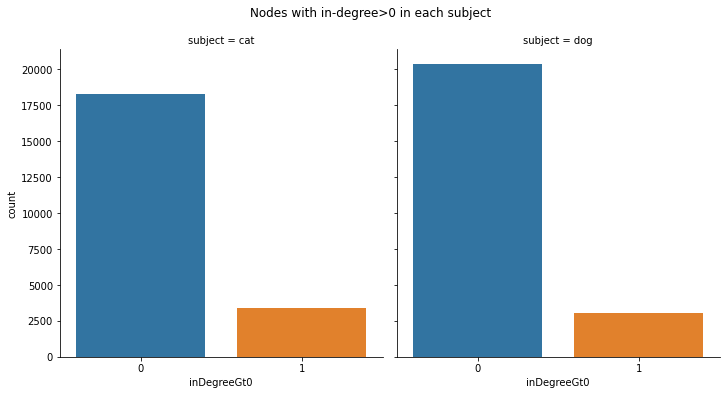

In [ ]:
f=sns.catplot(data=final_indeg_df, 
              x='inDegreeGt0', col='subject', kind='count', 
              sharey=True)
f.fig.suptitle("Nodes with in-degree>0 in each subject", y=1.05)

## Saving the Networks

In [ ]:
nx.write_gml(cats_g, 'graph_tweet_cats.gml.gz')
nx.write_gml(dogs_g, 'graph_tweet_dogs.gml.gz')